Artificial Neural Networks - Forward Propagation

Objective for this Notebook
1. Initalize a Network
2. Compute Weighted Sum at Each Node. ¶
3. Compute Node Activation 
4. Access your Flask app via a webpage anywhere using a custom link. 

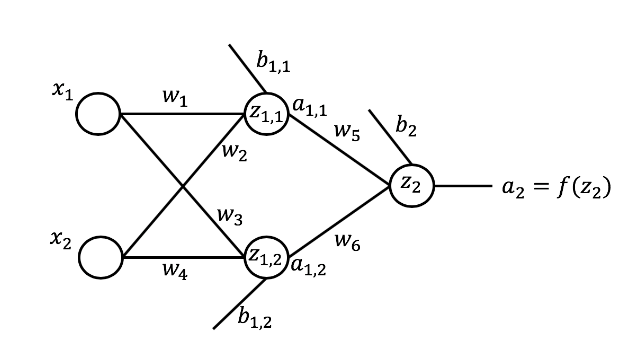

Let's start by randomly initializing the weights and the biases in the network. We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

In [ ]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases
print(weights)
print(biases)

#Now that we have the weights and the biases defined for the network, let's compute the output for a given input,  𝑥1 and  𝑥2
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is {} and x2 is {}'.format(x_1, x_2))

Let's start by computing the wighted sum of the inputs,  𝑧1,1
 , at the first node of the hidden layer.

In [ ]:
### type your answer here
z_12 = x_1*weights[2] + x_2*weights[3] + biases[1]
print(z_12)

print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=4)))


 Assuming a sigmoid activation function, let's compute the activation of the first node,  𝑎1,1
 , in the hidden layer.

In [ ]:
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

Let's also compute the activation of the second node,  𝑎1,2
 , in the hidden layer. Assign the value to a_12.

In [ ]:
a_12 = 1.0 / (1.0 + np.exp(-z_12))
print(a_12)
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

Now these activations will serve as the inputs to the output layer. So, let's compute the weighted sum of these inputs to the node in the output layer. Assign the value to z_2.

In [ ]:
### type your answer here
z_2=a_11*weights[4] + a_12*weights[5] + biases[2]
print(z_2)
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

In [ ]:
Let's compute the output of the network as the activation of the node in the output layer. Assign the value to a_2.

In [ ]:
a_2=1.0 / (1.0 + np.exp(-z_2))
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))

neural networks for real problems are composed of many hidden layers and many more nodes in each layer. So, we can't continue making predictions using this very inefficient approach of computing the weighted sum at each node and the activation of each node manually.

In order to code an automatic way of making predictions, let's generalize our network. A general network would take  𝑛
  inputs, would have many hidden layers, each hidden layer having  𝑚
  nodes, and would have an output layer. Although the network is showing one hidden layer, but we will code the network to have many hidden layers. Similarly, although the network shows an output layer with one node, we will code the network to have more than one node in the output layer.


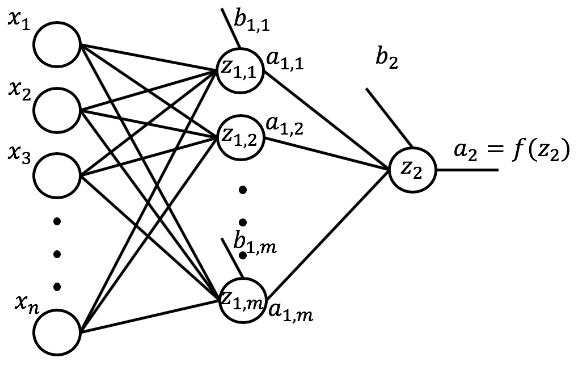

Initialize a Network

Let's start by formally defining the structure of the network.

In [ ]:
n = 2 # number of inputs
num_hidden_layers = 2 # number of hidden layers
m = [2, 2] # number of nodes in each hidden layer
num_nodes_output = 1 # number of nodes in the output layer

Let's go ahead and inititailize the weights and the biases in the network to random numbers. In order to be able to initialize the weights and the biases to random numbers, we will need to import the Numpy library

In [ ]:
import numpy as np # import the Numpy library

num_nodes_previous = n # number of nodes in the previous layer

network = {} # initialize network an an empty dictionary

# loop through each layer and randomly initialize the weights and biases associated with each node
# notice how we are adding 1 to the number of hidden layers in order to include the output layer
for layer in range(num_hidden_layers + 1): 
    
    # determine name of layer
    if layer == num_hidden_layers:
        layer_name = 'output'
        num_nodes = num_nodes_output
    else:
        layer_name = 'layer_{}'.format(layer + 1)
        num_nodes = m[layer]
        print(layer_name)
        print(num_nodes)
    
    # initialize weights and biases associated with each node in the current layer
    network[layer_name] = {}
    for node in range(num_nodes):
        node_name = 'node_{}'.format(node+1)
        network[layer_name][node_name] = {
            'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
            'bias': np.around(np.random.uniform(size=1), decimals=2),
        }
    
    num_nodes_previous = num_nodes
    
print(network) # print network

So now with the above code, we are able to initialize the weights and the biases pertaining to any network of any number of hidden layers and number of nodes in each layer. But let's put this code in a function so that we are able to repetitively execute all this code whenever we want to construct a neural network.